# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

data = pd.read_csv('/content/drive/MyDrive/ML_PAnum/NB et datas/DPT1&2_Lissé.csv')
data

,OBJECTID_1,OBJECTID,ample_ID,ample_ID.1,Easting_ITM,Northing_ITM,Cu_mgkg_ICPar,Fe___ICPar,S___ICPar,Zn_mgkg_ICPar,Ag_mgkg_ICPar,As_mgkg_ICPar,Hg_mgkg_ICPar,Pb_mgkg_ICPar,Te_mgkg_ICPar,Au_mgkg_ICPar,Cs_mgkg_ICPar,Pd_mgkg_ICPar
0,2,2,580001,580001,636448.29,919025.99,32.90,4.770,0.03,66.7,0.068,7.03,0.071,15.95,0.120,0.0013,0.322,0.0010
1,3,3,580002,580002,642931.19,948597.61,25.80,3.820,0.02,57.6,0.059,16.75,0.041,16.10,0.040,0.0017,0.351,0.0030
2,4,4,580004,580004,632564.44,948546.72,6.81,1.770,0.10,25.7,0.079,5.15,0.112,17.80,0.090,0.0008,0.297,0.0020
3,5,5,580005,580005,646281.44,947401.84,13.90,4.810,0.44,17.9,0.066,106.00,0.237,19.40,0.070,0.0005,0.175,0.0030
4,6,6,580006,580006,662939.78,945411.12,23.20,3.830,0.03,58.2,0.103,6.05,0.072,27.10,0.270,0.0007,0.238,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,9850,9850,617270,616365,552943.87,712914.69,13.15,1.375,0.03,57.8,0.135,6.57,0.061,13.30,0.019,0.0002,0.952,0.0005
9839,9851,9851,617343,616366,683009.95,769105.90,27.80,2.670,0.03,84.5,0.082,6.95,0.099,26.80,0.022,0.0017,0.743,0.0005
9840,9852,9852,617392,616367,693183.78,769396.78,27.40,2.430,0.03,88.9,0.121,14.20,0.093,35.50,0.024,0.0007,0.981,0.0005
9841,9853,9853,617430,616368,615148.53,755466.22,14.70,3.440,0.03,166.5,0.084,10.10,0.046,23.80,0.031,0.0001,0.993,0.0010


# Dataset coordonnes Easting Northing

In [6]:
coord_EN = data[['ample_ID', 'Easting_ITM', 'Northing_ITM']]
coord_EN.loc[:,'tuples_EN'] = [(data.loc[:,('Easting_ITM')][i], data.loc[:,('Northing_ITM')][i]) for i in list(range(data.shape[0]))]
coord_EN

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,ample_ID,Easting_ITM,Northing_ITM,tuples_EN
0,580001,636448.29,919025.99,"(636448.29, 919025.99)"
1,580002,642931.19,948597.61,"(642931.19, 948597.61)"
2,580004,632564.44,948546.72,"(632564.44, 948546.72)"
3,580005,646281.44,947401.84,"(646281.44, 947401.84)"
4,580006,662939.78,945411.12,"(662939.78, 945411.12)"
...,...,...,...,...
9838,617270,552943.87,712914.69,"(552943.87, 712914.69)"
9839,617343,683009.95,769105.90,"(683009.95, 769105.9)"
9840,617392,693183.78,769396.78,"(693183.78, 769396.78)"
9841,617430,615148.53,755466.22,"(615148.53, 755466.22)"


## Plot dataset complet

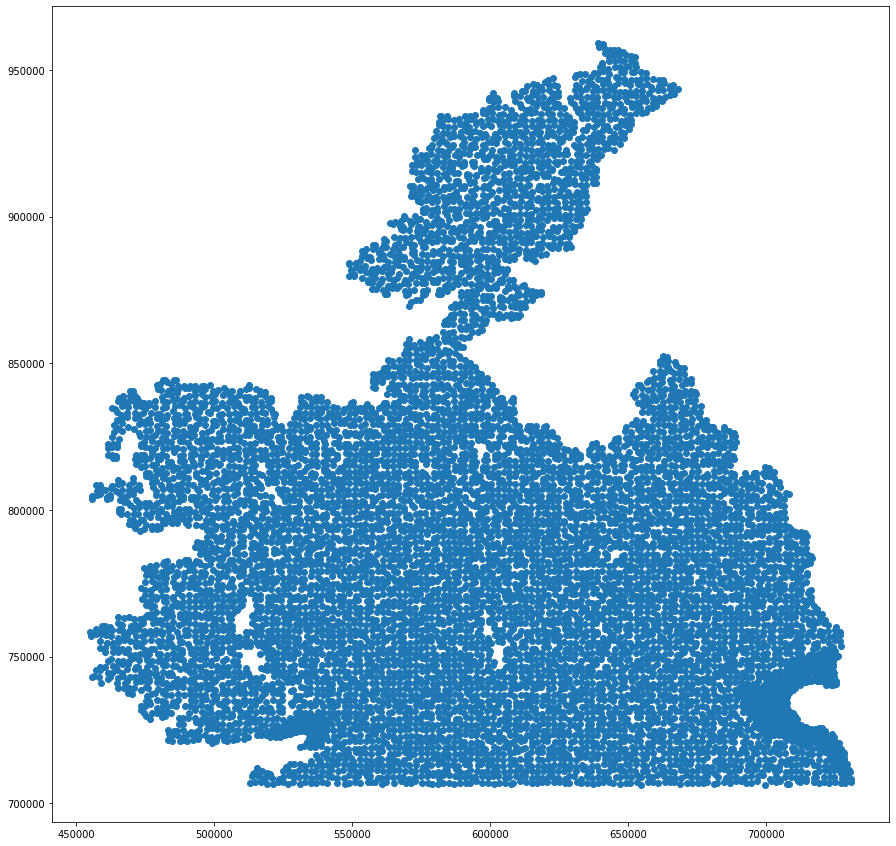

In [8]:
plt.figure(figsize=(15,15))
plt.scatter(coord_EN['Easting_ITM'], coord_EN['Northing_ITM'])

# df = dataset complet avec le id et les elements

In [9]:
data.sort_values('ample_ID', inplace = True)
data.drop(['Easting_ITM', 'Northing_ITM','OBJECTID_1', 'OBJECTID', 'ample_ID.1'], axis = 1, inplace = True)
df = data.copy()
df

,ample_ID,Cu_mgkg_ICPar,Fe___ICPar,S___ICPar,Zn_mgkg_ICPar,Ag_mgkg_ICPar,As_mgkg_ICPar,Hg_mgkg_ICPar,Pb_mgkg_ICPar,Te_mgkg_ICPar,Au_mgkg_ICPar,Cs_mgkg_ICPar,Pd_mgkg_ICPar
0,580001,32.90,4.770,0.03,66.7,0.068,7.03,0.071,15.95,0.12,0.0013,0.322,0.0010
1,580002,25.80,3.820,0.02,57.6,0.059,16.75,0.041,16.10,0.04,0.0017,0.351,0.0030
2,580004,6.81,1.770,0.10,25.7,0.079,5.15,0.112,17.80,0.09,0.0008,0.297,0.0020
3,580005,13.90,4.810,0.44,17.9,0.066,106.00,0.237,19.40,0.07,0.0005,0.175,0.0030
4,580006,23.20,3.830,0.03,58.2,0.103,6.05,0.072,27.10,0.27,0.0007,0.238,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,650794,32.20,2.500,0.03,116.5,0.223,13.90,0.128,46.20,0.03,0.0015,0.597,0.0005
5572,650796,14.40,1.895,0.10,61.5,0.161,23.80,0.091,37.00,0.29,0.0055,1.670,0.0005
5573,650797,16.35,0.866,0.06,56.2,0.127,4.66,0.200,57.50,0.06,0.0071,0.716,0.0005
5574,650798,23.70,0.412,0.19,10.0,0.094,2.94,0.141,28.20,0.11,0.0006,1.185,0.0005


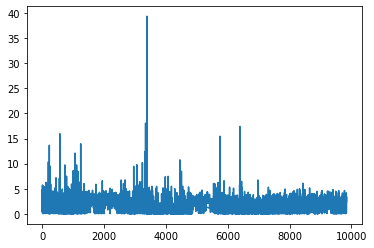

In [11]:
plt.plot(df['Fe___ICPar'])

## Plot des distribuitions

Cu_mgkg_ICPar


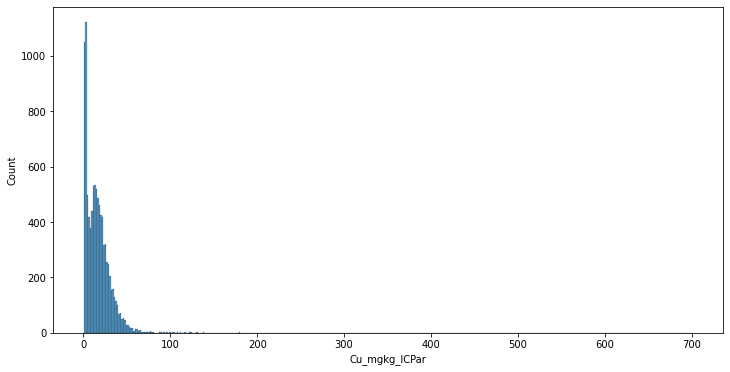

Fe___ICPar


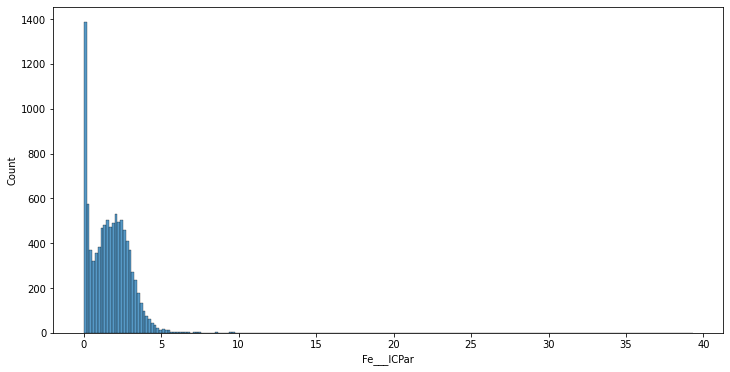

S___ICPar


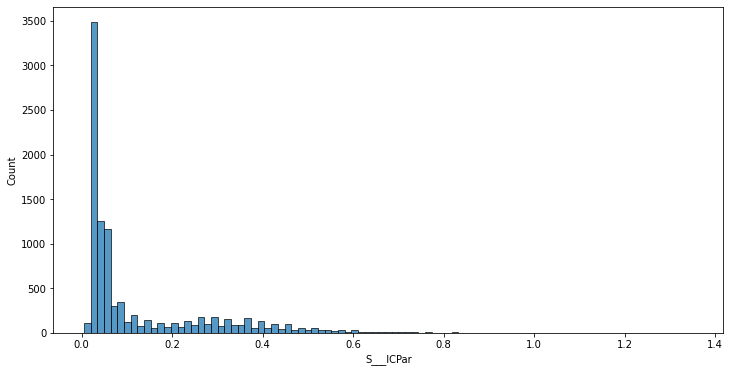

Zn_mgkg_ICPar


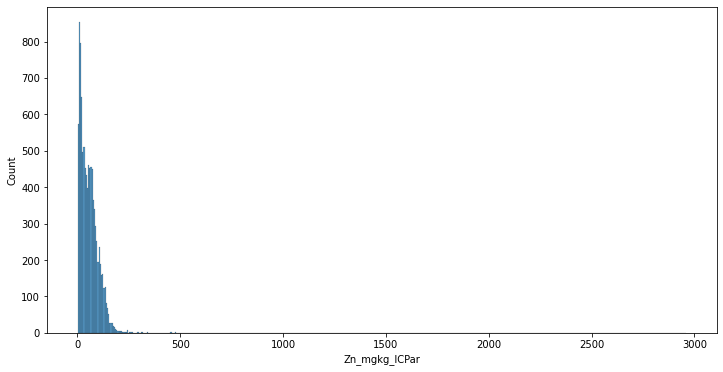

Ag_mgkg_ICPar


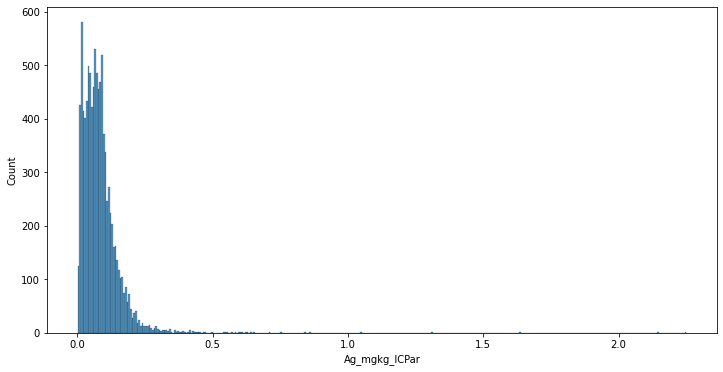

As_mgkg_ICPar


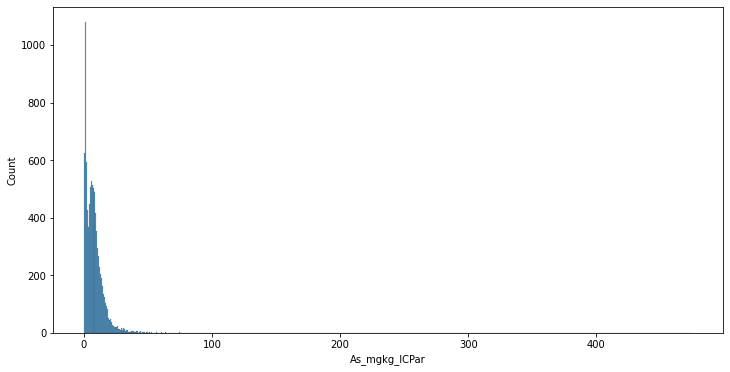

Hg_mgkg_ICPar


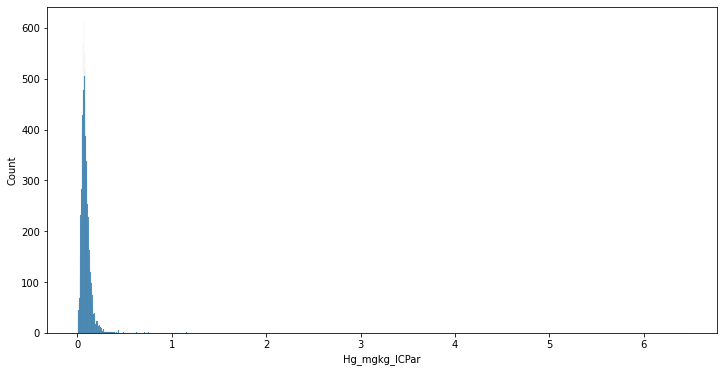

Pb_mgkg_ICPar


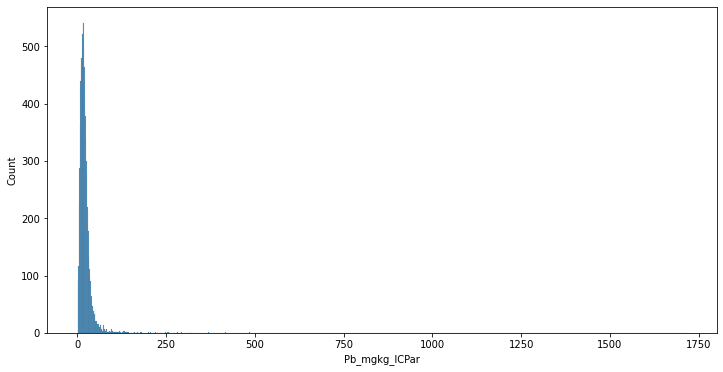

Te_mgkg_ICPar


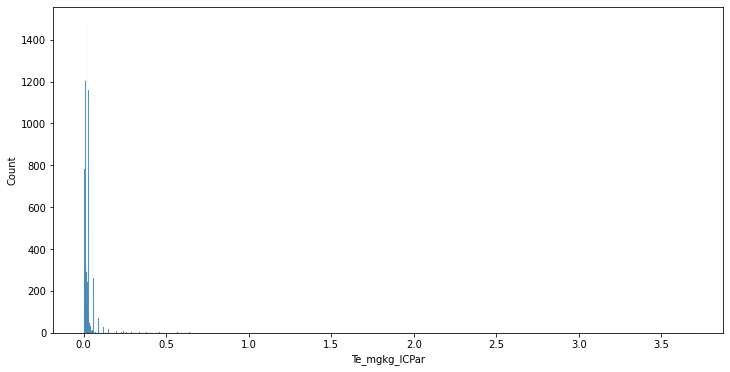

Au_mgkg_ICPar


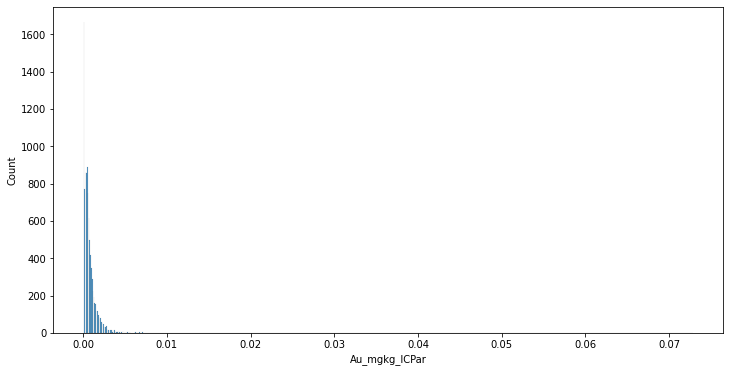

Cs_mgkg_ICPar


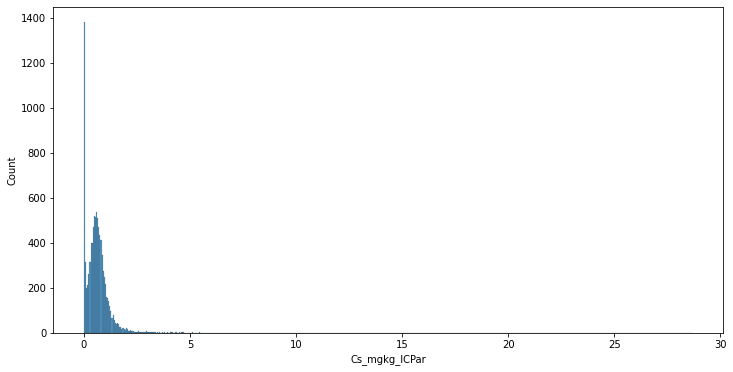

Pd_mgkg_ICPar


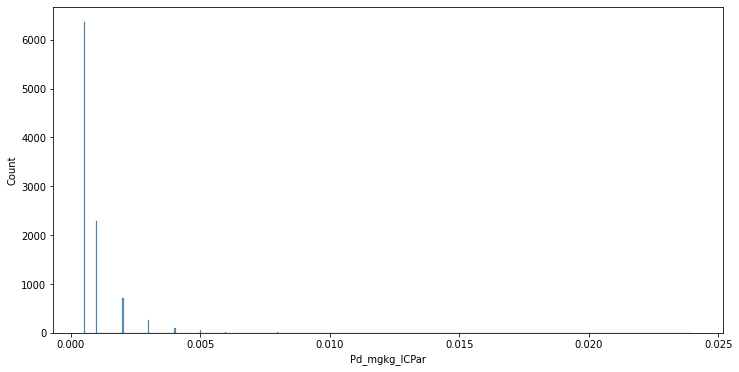

In [12]:
elements = list(df.columns)
elements.remove('ample_ID')
for x in elements:
  print(x)
  plt.figure(figsize=(12,6))
  sns.histplot(df[x])
  plt.show()

## Description du dataset

In [13]:
df[elements].describe()

,Cu_mgkg_ICPar,Fe___ICPar,S___ICPar,Zn_mgkg_ICPar,Ag_mgkg_ICPar,As_mgkg_ICPar,Hg_mgkg_ICPar,Pb_mgkg_ICPar,Te_mgkg_ICPar,Au_mgkg_ICPar,Cs_mgkg_ICPar,Pd_mgkg_ICPar
count,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000
mean,16.631678,1.722593,0.128544,57.584344,0.082121,8.289077,0.089478,21.630891,0.031596,0.000811,0.643713,0.000911
std,16.962698,1.347094,0.160298,58.490006,0.072859,11.524027,0.086967,27.266090,0.071284,0.001426,0.691978,0.001047
min,0.310000,0.011000,0.005000,1.000000,0.000500,0.020000,0.002000,0.086000,0.001500,0.000100,0.002500,0.000500
25%,4.730000,0.624000,0.030000,20.100000,0.039000,2.550000,0.058000,11.425000,0.010000,0.000300,0.281000,0.000500
50%,14.000000,1.665000,0.050000,48.900000,0.071000,6.600000,0.079000,17.700000,0.020000,0.000500,0.568000,0.000500
75%,23.300000,2.560000,0.190000,81.400000,0.106000,10.700000,0.105000,25.300000,0.032000,0.001000,0.839000,0.001000
max,701.000000,39.300000,1.350000,2960.000000,2.250000,475.000000,6.450000,1715.000000,3.690000,0.072800,28.700000,0.024000


Plot de la variable Au

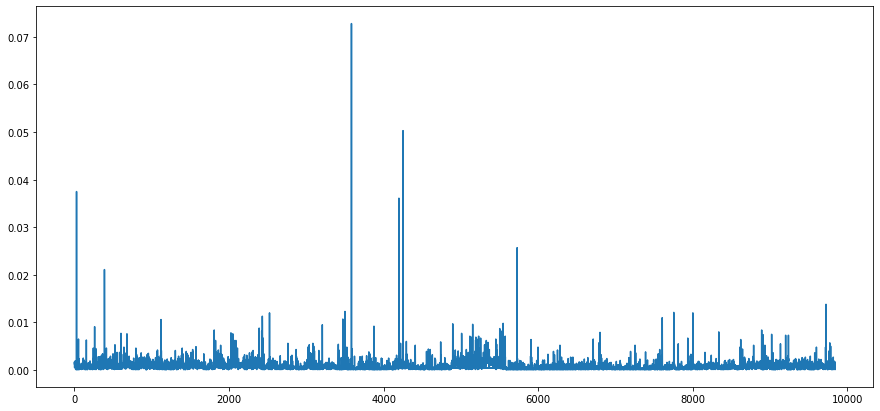

In [14]:
plt.figure(figsize=(15,7))
plt.plot(df['Au_mgkg_ICPar'])
plt.show()

Distribuition de la variable au

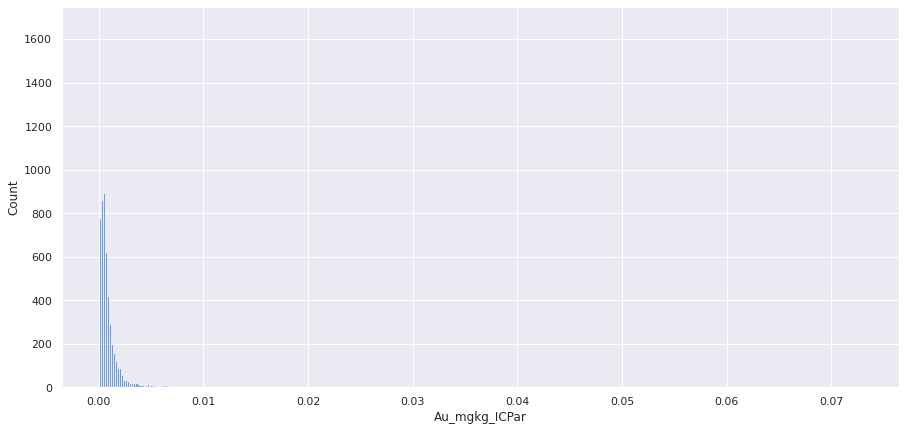

In [ ]:
plt.figure(figsize=(15,7))
sns.histplot(df['Au_mgkg_ICPar'])
plt.show()

In [16]:
df['Au_mgkg_ICPar'].std()

0.001426160856921553

## Detection des outliers

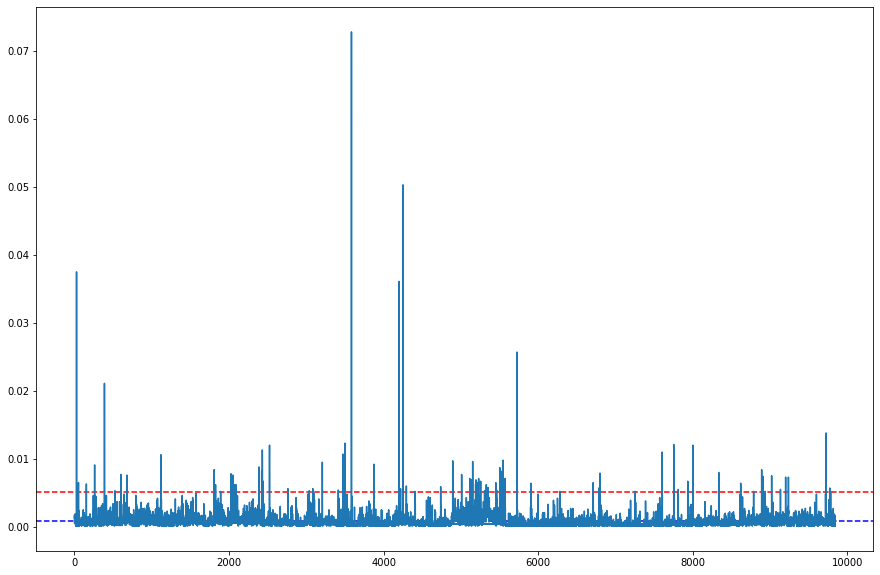

In [17]:
moy_AU = df['Au_mgkg_ICPar'].mean()
std_AU = df['Au_mgkg_ICPar'].std()
plt.figure(figsize=(15,10))
plt.axhline(y = moy_AU, color = 'b', linestyle = '--')
plt.axhline(y = moy_AU+3*std_AU, color = 'r', linestyle = '--')
plt.plot(df.index,df['Au_mgkg_ICPar'])
plt.show()

# Correlation entre les differentes features de df

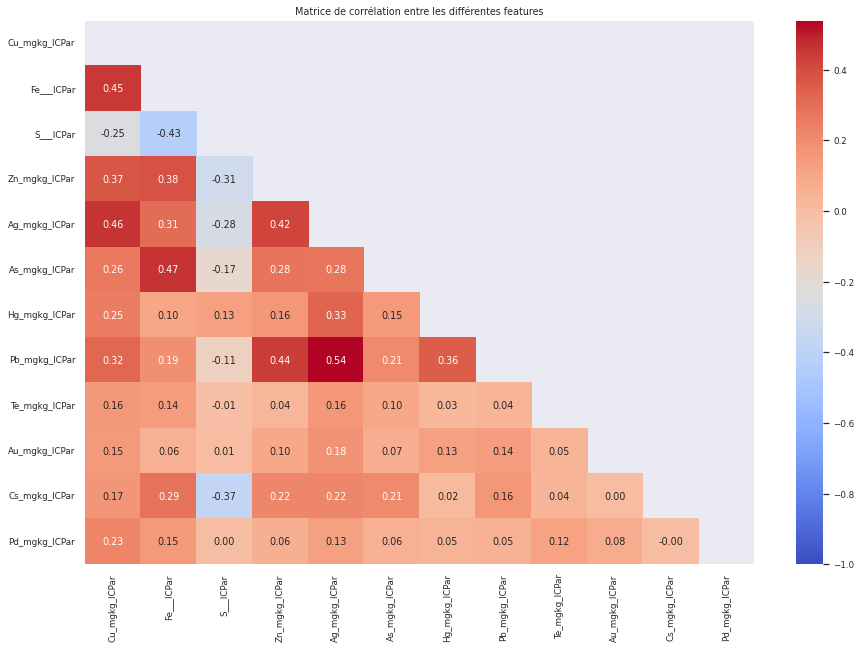

In [18]:
plt.figure(figsize=(15,10))
sns.set(font_scale=0.8)
plt.title('Matrice de corrélation entre les différentes features')

corr = df[elements].corr()

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm',annot=True,fmt=".2f")
plt.show()
sns.set(font_scale=1)

# df_outliers = fortes concentrations en Au

In [19]:
df_outliers = df[df['Au_mgkg_ICPar'] > (moy_AU + 3*std_AU)]
df_outliers

,ample_ID,Cu_mgkg_ICPar,Fe___ICPar,S___ICPar,Zn_mgkg_ICPar,Ag_mgkg_ICPar,As_mgkg_ICPar,Hg_mgkg_ICPar,Pb_mgkg_ICPar,Te_mgkg_ICPar,Au_mgkg_ICPar,Cs_mgkg_ICPar,Pd_mgkg_ICPar
28,580032,22.10,1.590,0.19,37.3,0.149,5.94,0.070,11.50,0.08,0.0375,0.317,0.0010
53,580059,36.50,3.770,0.06,55.4,0.137,31.70,0.094,19.10,0.13,0.0065,0.419,0.0010
155,580178,179.50,4.410,0.15,71.5,0.412,8.74,0.317,18.40,0.69,0.0063,0.488,0.0240
262,580300,20.20,2.470,0.04,53.5,0.153,8.08,0.066,14.35,0.04,0.0091,0.408,0.0020
389,580444,75.40,3.170,0.45,35.6,0.426,16.70,0.204,39.60,0.03,0.0211,0.222,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5546,650761,282.00,3.690,0.10,930.0,2.250,63.80,2.140,1715.00,0.06,0.0098,1.035,0.0020
5549,650764,61.50,2.450,0.04,169.5,0.428,17.50,0.420,121.00,0.03,0.0055,0.621,0.0020
5562,650782,62.50,2.350,0.07,139.5,0.541,18.15,0.906,180.50,0.02,0.0070,0.834,0.0005
5572,650796,14.40,1.895,0.10,61.5,0.161,23.80,0.091,37.00,0.29,0.0055,1.670,0.0005


Corrélations entre les ouliers

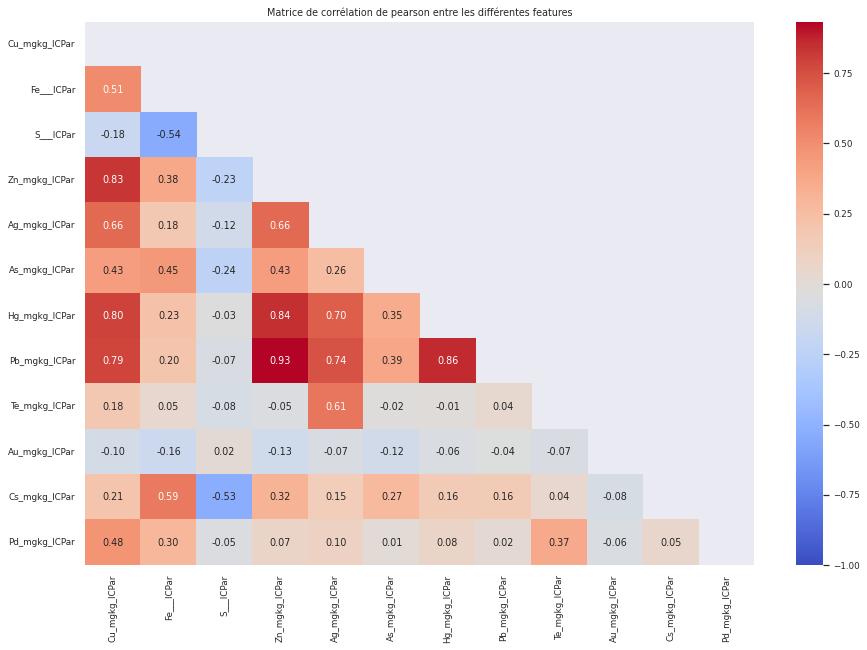

In [20]:
plt.figure(figsize=(15,10))
sns.set(font_scale=0.8)
plt.title('Matrice de corrélation de pearson entre les différentes features')

corr = df_outliers[elements].corr()

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm',annot=True,fmt=".2f")
plt.show()
sns.set(font_scale=1)

# Merge coord_EN avec df_outliers

In [21]:
coord_EN

,ample_ID,Easting_ITM,Northing_ITM,tuples_EN
0,580001,636448.29,919025.99,"(636448.29, 919025.99)"
1,580002,642931.19,948597.61,"(642931.19, 948597.61)"
2,580004,632564.44,948546.72,"(632564.44, 948546.72)"
3,580005,646281.44,947401.84,"(646281.44, 947401.84)"
4,580006,662939.78,945411.12,"(662939.78, 945411.12)"
...,...,...,...,...
9838,617270,552943.87,712914.69,"(552943.87, 712914.69)"
9839,617343,683009.95,769105.90,"(683009.95, 769105.9)"
9840,617392,693183.78,769396.78,"(693183.78, 769396.78)"
9841,617430,615148.53,755466.22,"(615148.53, 755466.22)"


In [22]:
df_outliers

,ample_ID,Cu_mgkg_ICPar,Fe___ICPar,S___ICPar,Zn_mgkg_ICPar,Ag_mgkg_ICPar,As_mgkg_ICPar,Hg_mgkg_ICPar,Pb_mgkg_ICPar,Te_mgkg_ICPar,Au_mgkg_ICPar,Cs_mgkg_ICPar,Pd_mgkg_ICPar
28,580032,22.10,1.590,0.19,37.3,0.149,5.94,0.070,11.50,0.08,0.0375,0.317,0.0010
53,580059,36.50,3.770,0.06,55.4,0.137,31.70,0.094,19.10,0.13,0.0065,0.419,0.0010
155,580178,179.50,4.410,0.15,71.5,0.412,8.74,0.317,18.40,0.69,0.0063,0.488,0.0240
262,580300,20.20,2.470,0.04,53.5,0.153,8.08,0.066,14.35,0.04,0.0091,0.408,0.0020
389,580444,75.40,3.170,0.45,35.6,0.426,16.70,0.204,39.60,0.03,0.0211,0.222,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5546,650761,282.00,3.690,0.10,930.0,2.250,63.80,2.140,1715.00,0.06,0.0098,1.035,0.0020
5549,650764,61.50,2.450,0.04,169.5,0.428,17.50,0.420,121.00,0.03,0.0055,0.621,0.0020
5562,650782,62.50,2.350,0.07,139.5,0.541,18.15,0.906,180.50,0.02,0.0070,0.834,0.0005
5572,650796,14.40,1.895,0.10,61.5,0.161,23.80,0.091,37.00,0.29,0.0055,1.670,0.0005


In [23]:
outliers_AU_avec_EN = coord_EN.merge(df_outliers, left_on = 'ample_ID', right_on='ample_ID')
outliers_AU_avec_EN

,ample_ID,Easting_ITM,Northing_ITM,tuples_EN,Cu_mgkg_ICPar,Fe___ICPar,S___ICPar,Zn_mgkg_ICPar,Ag_mgkg_ICPar,As_mgkg_ICPar,Hg_mgkg_ICPar,Pb_mgkg_ICPar,Te_mgkg_ICPar,Au_mgkg_ICPar,Cs_mgkg_ICPar,Pd_mgkg_ICPar
0,580032,652714.03,946577.95,"(652714.03, 946577.95)",22.10,1.59,0.19,37.3,0.149,5.94,0.070,11.50,0.080,0.0375,0.317,0.0010
1,580059,632973.06,921064.59,"(632973.06, 921064.59)",36.50,3.77,0.06,55.4,0.137,31.70,0.094,19.10,0.130,0.0065,0.419,0.0010
2,580178,661263.16,946691.86,"(661263.16, 946691.86)",179.50,4.41,0.15,71.5,0.412,8.74,0.317,18.40,0.690,0.0063,0.488,0.0240
3,580300,631159.62,937147.17,"(631159.62, 937147.17)",20.20,2.47,0.04,53.5,0.153,8.08,0.066,14.35,0.040,0.0091,0.408,0.0020
4,580444,618727.23,931149.57,"(618727.23, 931149.57)",75.40,3.17,0.45,35.6,0.426,16.70,0.204,39.60,0.030,0.0211,0.222,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,615661,694549.54,775245.51,"(694549.54, 775245.51)",27.60,3.41,0.03,99.3,0.072,13.95,0.132,28.00,0.019,0.0055,1.040,0.0010
85,615737,542560.19,735007.01,"(542560.19, 735007.01)",16.95,1.11,0.03,45.5,0.079,4.86,0.062,15.65,0.008,0.0073,0.735,0.0005
86,615778,679513.62,758582.20,"(679513.62, 758582.2)",28.90,2.36,0.02,105.0,0.119,9.43,0.090,20.60,0.026,0.0073,0.593,0.0030
87,616320,724568.53,711259.19,"(724568.53, 711259.19)",20.10,2.93,0.05,73.7,0.080,13.95,0.159,35.90,0.026,0.0138,2.190,0.0005


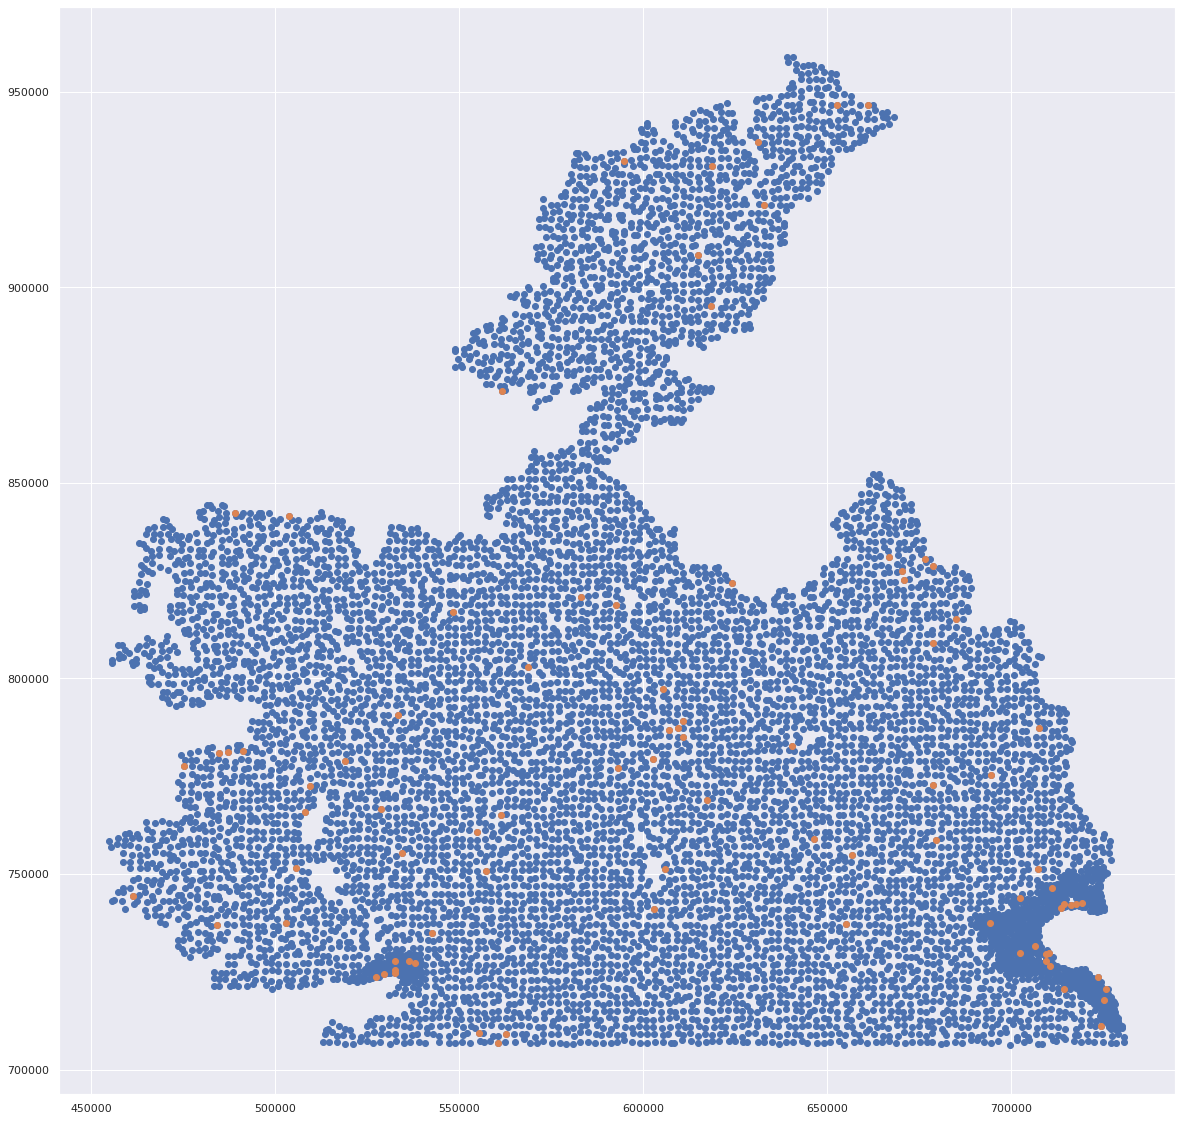

In [24]:
plt.figure(figsize=(20,20))
plt.scatter(coord_EN['Easting_ITM'], coord_EN['Northing_ITM'])
plt.scatter(outliers_AU_avec_EN['Easting_ITM'], outliers_AU_avec_EN['Northing_ITM'])
plt.show()

# Suppresion du fond géochimique

In [25]:
cols = ['ample_ID','Cu_mgkg_ICPar', 'Fe___ICPar', 'S___ICPar', 'Zn_mgkg_ICPar',
'Ag_mgkg_ICPar', 'As_mgkg_ICPar', 'Hg_mgkg_ICPar', 'Pb_mgkg_ICPar', 'Te_mgkg_ICPar',
'Au_mgkg_ICPar', 'Cs_mgkg_ICPar', 'Pd_mgkg_ICPar']

In [27]:
# on crée ds avec une copie de df
ds = df.copy()
# nomer les collones de ds de 0
a = list(range(ds.shape[1]))
ds.columns = a
ds

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,580001,32.90,4.770,0.03,66.7,0.068,7.03,0.071,15.95,0.12,0.0013,0.322,0.0010
1,580002,25.80,3.820,0.02,57.6,0.059,16.75,0.041,16.10,0.04,0.0017,0.351,0.0030
2,580004,6.81,1.770,0.10,25.7,0.079,5.15,0.112,17.80,0.09,0.0008,0.297,0.0020
3,580005,13.90,4.810,0.44,17.9,0.066,106.00,0.237,19.40,0.07,0.0005,0.175,0.0030
4,580006,23.20,3.830,0.03,58.2,0.103,6.05,0.072,27.10,0.27,0.0007,0.238,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,650794,32.20,2.500,0.03,116.5,0.223,13.90,0.128,46.20,0.03,0.0015,0.597,0.0005
5572,650796,14.40,1.895,0.10,61.5,0.161,23.80,0.091,37.00,0.29,0.0055,1.670,0.0005
5573,650797,16.35,0.866,0.06,56.2,0.127,4.66,0.200,57.50,0.06,0.0071,0.716,0.0005
5574,650798,23.70,0.412,0.19,10.0,0.094,2.94,0.141,28.20,0.11,0.0006,1.185,0.0005


In [34]:
moy = ds[1].mean()
et = ds[1].std()
set(list(ds[ds[1]>moy+3*et][0]))

{580013,
 580018,
 580082,
 580104,
 580133,
 580139,
 580157,
 580178,
 580209,
 580258,
 580371,
 580444,
 580551,
 580622,
 580627,
 580630,
 580635,
 580695,
 580707,
 580827,
 580930,
 580995,
 581090,
 581229,
 581372,
 581386,
 581471,
 581536,
 581541,
 581586,
 581706,
 581747,
 581765,
 581881,
 581895,
 581904,
 581914,
 582049,
 582202,
 582230,
 582287,
 582399,
 582492,
 582874,
 582930,
 582957,
 583011,
 583022,
 583049,
 583613,
 583691,
 583858,
 583870,
 583890,
 610529,
 610555,
 610634,
 611065,
 611458,
 611947,
 612069,
 612630,
 612652,
 612801,
 612908,
 612917,
 613165,
 613637,
 613914,
 613974,
 613992,
 614012,
 614629,
 614930,
 615256,
 615767,
 615874,
 650059,
 650218,
 650340,
 650353,
 650687,
 650700,
 650755,
 650756,
 650761}

In [36]:
# moyennes et écarts types de toute les colonnes de ds 
moyennes = [ds[i].mean() for i in a]
e_types = [ds[i].std() for i in a]
# liste de sets crées a partir de la premiere colonne(id) de des datasets restreints
x = [set(ds[ds[x]>(moyennes[x]+3*e_types[x])][0]) for x in list(range(1,13))]

In [37]:
# outliers_list c'est la liste de l'ensemble de l'union des 12 ensembles de la liste x
outliers_list = list(set.union(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9],x[10],x[11]))
# on crée un dictionaire avec un mot et une cle (le nom de la colonne et la  liste outliers_list )
d = {'id_outliers': outliers_list}
outliers = pd.DataFrame.from_dict(d)
outliers

,id_outliers
0,614401
1,614403
2,610314
3,583691
4,583694
...,...
836,612333
837,616433
838,581626
839,583675


In [38]:
# on revient avec les noms
ds.columns = cols
# on fait le merge pour avoir les valeurs
fond_geoCH = ds.merge(outliers, left_on='ample_ID', right_on='id_outliers')
# on fait un dernier merge pour avoir les coord_EN
fond_geoCH_EN = coord_EN.merge(fond_geoCH, left_on = 'ample_ID', right_on='ample_ID')
fond_geoCH_EN

,ample_ID,Easting_ITM,Northing_ITM,tuples_EN,Cu_mgkg_ICPar,Fe___ICPar,S___ICPar,Zn_mgkg_ICPar,Ag_mgkg_ICPar,As_mgkg_ICPar,Hg_mgkg_ICPar,Pb_mgkg_ICPar,Te_mgkg_ICPar,Au_mgkg_ICPar,Cs_mgkg_ICPar,Pd_mgkg_ICPar,id_outliers
0,580005,646281.44,947401.84,"(646281.44, 947401.84)",13.90,4.810,0.44,17.9,0.066,106.00,0.237,19.400,0.0700,0.0005,0.175,0.0030,580005
1,580006,662939.78,945411.12,"(662939.78, 945411.12)",23.20,3.830,0.03,58.2,0.103,6.05,0.072,27.100,0.2700,0.0007,0.238,0.0005,580006
2,580013,644895.84,956854.83,"(644895.84, 956854.83)",114.50,5.750,0.07,61.7,0.056,2.34,0.100,8.690,0.0400,0.0019,1.170,0.0110,580013
3,580018,650416.58,951208.98,"(650416.58, 951208.98)",72.30,1.620,0.53,20.9,0.186,12.80,0.231,16.350,0.0400,0.0008,0.326,0.0050,580018
4,580023,662463.89,946600.87,"(662463.89, 946600.87)",47.30,4.690,0.04,92.7,0.077,4.39,0.073,12.750,0.3600,0.0013,0.433,0.0020,580023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,616422,674588.44,723523.82,"(674588.44, 723523.82)",13.00,1.420,0.57,672.0,0.037,40.20,0.145,23.100,0.0070,0.0001,0.152,0.0005,616422
837,616428,719020.78,716807.02,"(719020.78, 716807.02)",12.00,1.530,0.02,63.5,0.068,20.50,0.038,29.300,0.0150,0.0001,7.400,0.0010,616428
838,616433,658246.01,727501.04,"(658246.01, 727501.04)",12.65,0.571,0.79,9.8,0.010,2.95,0.057,0.522,0.0070,0.0001,0.020,0.0010,616433
839,616475,656598.36,726611.25,"(656598.36, 726611.25)",1.98,0.636,0.85,9.7,0.009,3.08,0.030,0.507,0.0040,0.0001,0.029,0.0005,616475


## Plot

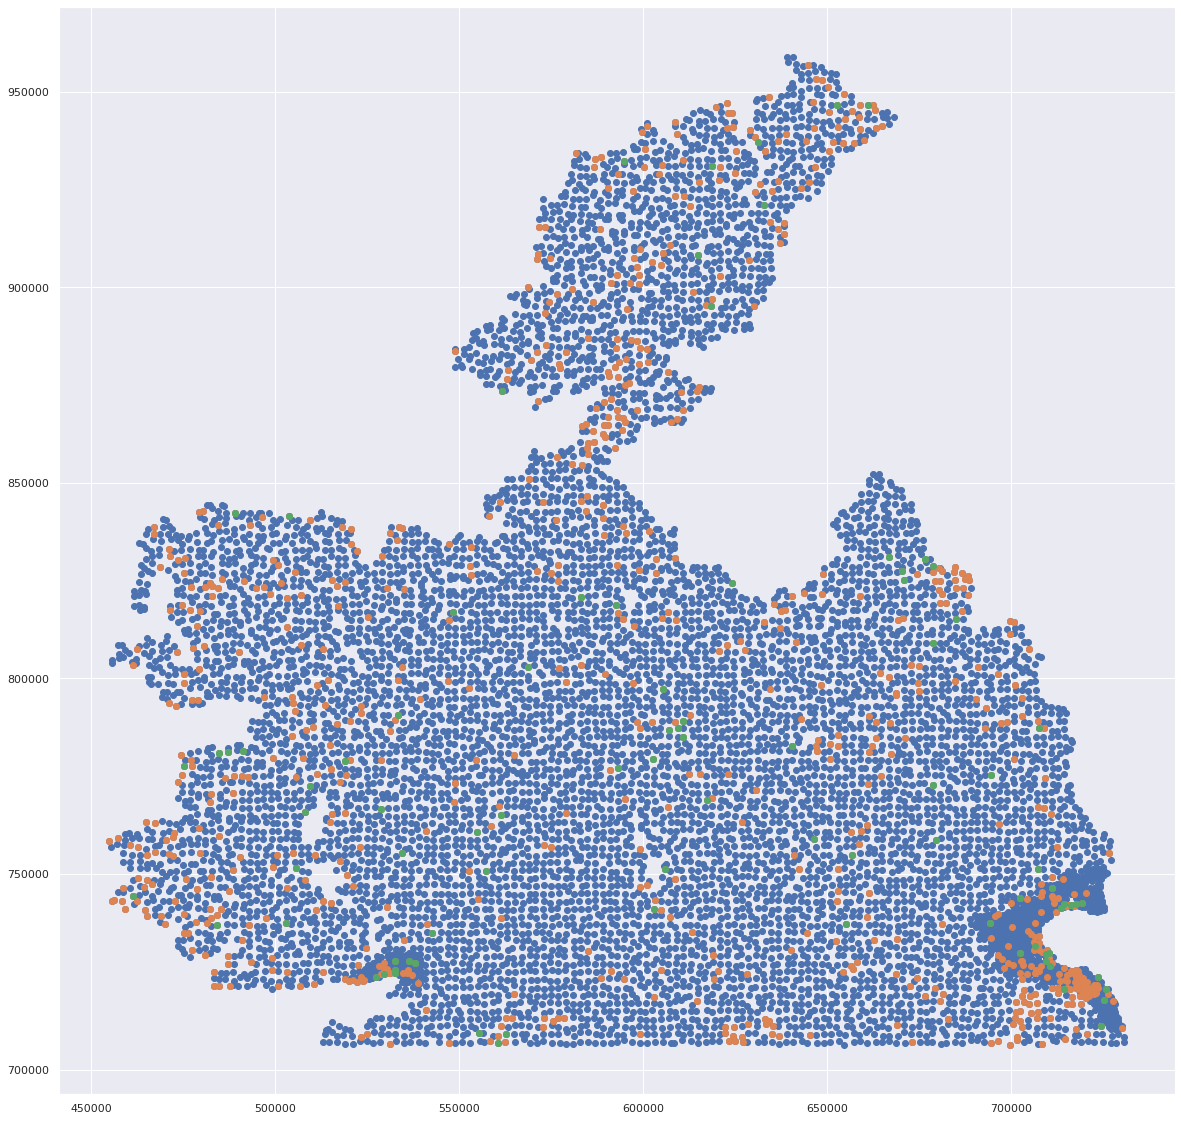

In [39]:
plt.figure(figsize=(20,20))
### On peut cacher ça ###
plt.scatter(coord_EN['Easting_ITM'], coord_EN['Northing_ITM'])
#####
plt.scatter(fond_geoCH_EN['Easting_ITM'], fond_geoCH_EN['Northing_ITM'])
plt.scatter(outliers_AU_avec_EN['Easting_ITM'], outliers_AU_avec_EN['Northing_ITM'])
plt.show()

# Récupération des voisinages des AU-outliers

In [40]:
df_outliers_tuples = coord_EN.merge(df_outliers, left_on='ample_ID', right_on='ample_ID')
liste_tuples_ouliers = [df_outliers_tuples['tuples_EN'][x] for x in list(range(df_outliers_tuples.shape[0]))]

d = []

for z in list(range(len(liste_tuples_ouliers))):
  centre_x = liste_tuples_ouliers[z][0] 
  centre_y = liste_tuples_ouliers[z][1] 
  distance = math.sqrt((centre_x - coord_EN['tuples_EN'][0][0])**2+(centre_y - coord_EN['tuples_EN'][0][1])**2)
  distance

  a = [math.sqrt((centre_x - coord_EN['tuples_EN'][x][0])**2+(centre_y - coord_EN['tuples_EN'][x][1])**2) for x in list(range(coord_EN.shape[0]))]

  test = coord_EN.copy()
  test['aa'] = a
  b = test[test['aa']<5000]
  c = len(b.index)
  b.index = list(range(c))
  b
  ample_id = [b['ample_ID'][x] for x in list(range(b.shape[0]))]
  ample_id, len(ample_id)
  d.extend(ample_id)
d_dataframe = pd.DataFrame(d)
d_dataframe

,0
0,580019
1,580026
2,580032
3,580051
4,580077
...,...
2513,616056
2514,616095
2515,616365
2516,616377


In [41]:
d_dataframe.duplicated().sum()

869

In [42]:
d=list(set(d))
d_dataframe = pd.DataFrame(d)
d_dataframe.columns = ['ample_ID']
id_voisinages_AU_outliers = d_dataframe.copy()
voisinages_AU_outliers = coord_EN.merge(id_voisinages_AU_outliers, left_on='ample_ID', right_on='ample_ID')
voisinages_AU_outliers

,ample_ID,Easting_ITM,Northing_ITM,tuples_EN
0,580001,636448.29,919025.99,"(636448.29, 919025.99)"
1,580006,662939.78,945411.12,"(662939.78, 945411.12)"
2,580016,665005.31,944514.30,"(665005.31, 944514.3)"
3,580019,652940.02,951087.99,"(652940.02, 951087.99)"
4,580023,662463.89,946600.87,"(662463.89, 946600.87)"
...,...,...,...,...
1644,616451,707304.57,746982.55,"(707304.57, 746982.55)"
1645,616466,721488.21,712616.92,"(721488.21, 712616.92)"
1646,617005,653316.12,735434.35,"(653316.12, 735434.35)"
1647,617104,560655.20,713082.62,"(560655.2, 713082.62)"


## Plot

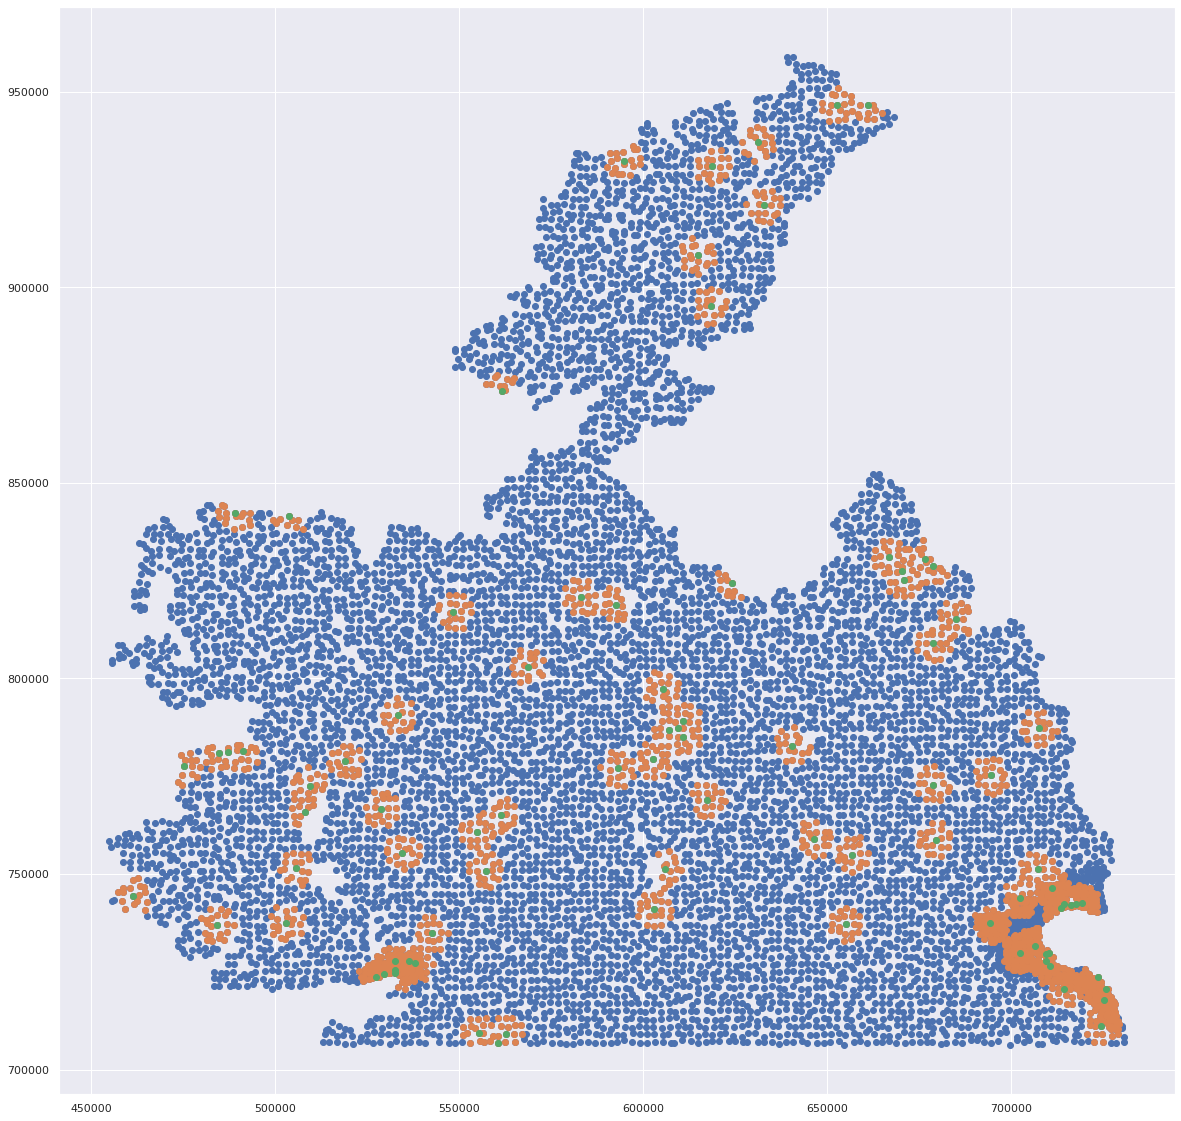

In [43]:
plt.figure(figsize=(20,20))
plt.scatter(coord_EN ['Easting_ITM'],coord_EN ['Northing_ITM']) # bleu
plt.scatter(voisinages_AU_outliers['Easting_ITM'],voisinages_AU_outliers['Northing_ITM']) # orange
plt.scatter(outliers_AU_avec_EN['Easting_ITM'], outliers_AU_avec_EN['Northing_ITM']) # vert